In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [2]:
# for faster execution
test_mode = False

# paths
root_dir = 'D:/OpenClassrooms/projet_5'
dataset_name = 'df_final_4'

# for bigger plots
scale_factor = 2

In [3]:
# set plot size
default_size = [6.0, 4.0]
scaled_size = [scale_factor * n for n in default_size]
plt.rcParams['figure.figsize'] = scaled_size


# get data
data_path = root_dir + '/data/' + dataset_name + '.csv'
df = pd.read_csv(data_path)

test_mode_samples = 10000
if test_mode:
    df = df.sample(test_mode_samples)
    
print(df.shape)
df.head()

(92456, 25)


,customer_unique_id,M,freight_value,R,nb_days_order_approved,nb_days_delivered_carrier,nb_days_delivered_customer,nb_days_estimate_delivery,payment_sequential,payment_installments,...,review_score,review_title,review_message,nb_days_survey_respond,zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,F
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,12.00,601,0.0,1.0,6.0,10.0,1.0,8.0,...,5.0,1,1,4.0,7787.0,cajamar,SP,-23.340262,-46.831085,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,8.29,598,0.0,2.0,3.0,7.0,1.0,1.0,...,4.0,0,0,0.0,6053.0,osasco,SP,-23.559044,-46.788516,1
2,0000f46a3911fa3c0805444483337064,69.00,17.22,176,0.0,2.0,25.0,27.0,1.0,8.0,...,3.0,0,0,1.0,88115.0,sao jose,SC,-27.542763,-48.635001,1
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,17.63,392,0.0,0.0,20.0,31.0,1.0,4.0,...,4.0,0,1,1.0,66812.0,belem,PA,-1.312726,-48.482748,1
4,0004aac84e0df4da2b147fca70cf8255,180.00,16.89,425,0.0,2.0,13.0,20.0,1.0,6.0,...,5.0,0,0,4.0,18040.0,sorocaba,SP,-23.505670,-47.469837,1


In [4]:
# make subset of the final dataframe for clustering with a model

to_keep = ['R', 
           'F', 
           'M', 
           'review_title', 
           'review_message', 
           'payment_installments', 
           'payment_sequential', 
           'nb_days_survey_respond', 
           'pay_boleto', 
           'pay_credit_card', 
           'pay_debit_card', 
           'pay_voucher', 
           'freight_value', 
           'payment_value'
          ]

data = df[to_keep]

print(data.shape)
data.head()

(92456, 14)


,R,F,M,review_title,review_message,payment_installments,payment_sequential,nb_days_survey_respond,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher,freight_value,payment_value
0,601,1,129.90,1,1,8.0,1.0,4.0,0,1,0,0,12.00,141.90
1,598,1,18.90,0,0,1.0,1.0,0.0,0,1,0,0,8.29,27.19
2,176,1,69.00,0,0,8.0,1.0,1.0,0,1,0,0,17.22,86.22
3,392,1,25.99,0,1,4.0,1.0,1.0,0,1,0,0,17.63,43.62
4,425,1,180.00,0,0,6.0,1.0,4.0,0,1,0,0,16.89,196.89


In [5]:
oldest, newest = min(data['R']), max(data['R'])
print('oldest:', oldest)
print('newest:', newest)

oldest: 18
newest: 713


In [6]:
data.sort_values('R')

,R,F,M,review_title,review_message,payment_installments,payment_sequential,nb_days_survey_respond,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher,freight_value,payment_value
39961,18,1,148.00,0,1,4.0,1.0,5.0,0,1,0,0,30.11,178.11
57572,18,1,189.00,0,0,4.0,1.0,1.0,0,1,0,0,48.45,237.45
50920,18,1,119.90,0,1,6.0,1.0,1.0,0,1,0,0,13.56,133.46
50911,18,1,299.99,0,1,10.0,1.0,14.0,0,1,0,0,19.01,319.00
27447,18,1,199.00,0,1,7.0,1.0,1.0,0,1,0,0,15.98,214.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46303,713,1,45.90,1,1,1.0,1.0,2.0,0,0,0,1,15.39,61.29
66182,713,1,24.90,1,0,1.0,1.0,0.0,0,1,0,0,8.33,33.23
13307,713,1,84.99,0,0,1.0,1.0,9.0,0,1,0,0,8.76,93.75
44176,713,1,63.90,1,1,7.0,1.0,21.0,0,1,0,0,9.20,73.10


In [7]:
def get_df_0(df, ratio):
    df_sorted = df.sort_values('R').reset_index()
    nb_rows = round(df_sorted.shape[0] * ratio)
    df_0 = df_sorted.loc[:nb_rows,:]
    return df_0.drop('index', axis=1)



def get_time_steps(df, t0, weeks_step):
    step = 7 * weeks_step
    
    oldest, newest = min(df['R']), max(df['R'])
    nb = newest - oldest
    T = []
    t = t0
    
    while t < newest:
        T.append(t)
        t += step
    T.pop(0)
    
    return T

In [8]:
# create first dataset with half data
ratio = 0.5

df_0 = get_df_0(data, ratio)
print(df_0.shape)
df_0

(46229, 14)


,R,F,M,review_title,review_message,payment_installments,payment_sequential,nb_days_survey_respond,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher,freight_value,payment_value
0,18,1,148.00,0,1,4.0,1.0,5.0,0,1,0,0,30.11,178.11
1,18,1,189.00,0,0,4.0,1.0,1.0,0,1,0,0,48.45,237.45
2,18,1,119.90,0,1,6.0,1.0,1.0,0,1,0,0,13.56,133.46
3,18,1,299.99,0,1,10.0,1.0,14.0,0,1,0,0,19.01,319.00
4,18,1,199.00,0,1,7.0,1.0,1.0,0,1,0,0,15.98,214.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46224,494,1,53.99,0,0,2.0,1.0,2.0,0,1,0,0,7.78,61.77
46225,494,1,359.60,0,1,8.0,1.0,3.0,0,1,0,0,121.30,408.12
46226,494,1,168.80,0,1,1.0,1.0,2.0,0,1,0,0,14.93,183.73
46227,494,1,49.99,0,0,1.0,1.0,1.0,0,1,0,0,7.78,57.77


In [9]:
# get time steps for all the others datasets
weeks_step = 1
t0 = df_0['R'].max()

T = get_time_steps(df, t0, weeks_step)

print('week', '\t', 'R', '\t', 'data')
print()


for i, t in enumerate(T):
    df_t = df[df['R'] <= t]
    print((i+1)*weeks_step, '\t', t, '\t', df_t.shape)

week 	 R 	 data

1 	 501 	 (47673, 25)
2 	 508 	 (49189, 25)
3 	 515 	 (50581, 25)
4 	 522 	 (52167, 25)
5 	 529 	 (53801, 25)
6 	 536 	 (55551, 25)
7 	 543 	 (57029, 25)
8 	 550 	 (58603, 25)
9 	 557 	 (60187, 25)
10 	 564 	 (61573, 25)
11 	 571 	 (63049, 25)
12 	 578 	 (64577, 25)
13 	 585 	 (66147, 25)
14 	 592 	 (67688, 25)
15 	 599 	 (69531, 25)
16 	 606 	 (71426, 25)
17 	 613 	 (72985, 25)
18 	 620 	 (73847, 25)
19 	 627 	 (74977, 25)
20 	 634 	 (76480, 25)
21 	 641 	 (77893, 25)
22 	 648 	 (79299, 25)
23 	 655 	 (80587, 25)
24 	 662 	 (81673, 25)
25 	 669 	 (82723, 25)
26 	 676 	 (84414, 25)
27 	 683 	 (85959, 25)
28 	 690 	 (88039, 25)
29 	 697 	 (89865, 25)
30 	 704 	 (91619, 25)
31 	 711 	 (92418, 25)


In [10]:
# model parameters
k_opti = 4

In [11]:
# train original model and scaler on df_0
X_0 = df_0.to_numpy()
scaler_0 = StandardScaler().fit(X_0)
X_0 = scaler_0.transform(X_0)

model_0 = KMeans(n_clusters=k_opti, random_state=0)
model_0.fit(X_0)

KMeans(n_clusters=4, random_state=0)

In [12]:
# for each week: 
# train new model & scaler and compare it to first model & scaler
# (the new model represents the result of a new maintenance)
scores = []

for t in T:
    df_t = data[data['R'] <= t]
    X_t = df_t.to_numpy()
    scaler_t = StandardScaler().fit(X_t)
    
    X_t_scaled = scaler_t.transform(X_t)
    X_t_old_scaler = scaler_0.transform(X_t)
    
    model_t = KMeans(n_clusters=k_opti, random_state=0)
    model_t.fit(X_t_scaled)
    pred_t = model_t.predict(X_t_scaled)
    pred_0 = model_0.predict(X_t_old_scaler)
    
    score = adjusted_rand_score(pred_t, pred_0)
    scores.append(score)

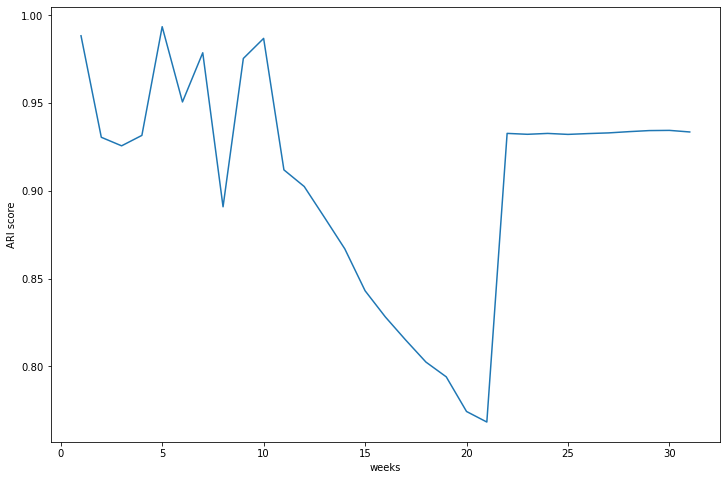

In [13]:
# plot results to see when a maintenance is usefull
# (ARI score limit is set to 0.8)
weeks = [(i+1) * weeks_step for i in range(len(scores))]

plt.figure()
plt.plot(weeks, scores)
plt.xlabel('weeks')
plt.ylabel('ARI score')
plt.show()

In [14]:
print('week', '\t', 'score', '\n')

for i, score in enumerate(scores):
    week = (i+1) * weeks_step
    print(week, '\t', round(score, 3))

week 	 score 

1 	 0.988
2 	 0.931
3 	 0.926
4 	 0.932
5 	 0.994
6 	 0.951
7 	 0.979
8 	 0.891
9 	 0.975
10 	 0.987
11 	 0.912
12 	 0.903
13 	 0.885
14 	 0.867
15 	 0.843
16 	 0.828
17 	 0.815
18 	 0.802
19 	 0.794
20 	 0.774
21 	 0.768
22 	 0.933
23 	 0.932
24 	 0.933
25 	 0.932
26 	 0.933
27 	 0.933
28 	 0.934
29 	 0.934
30 	 0.934
31 	 0.934


### Same as before with different amounts of data in the first dataset

In [15]:
def get_t0(ratio, df):
    df_sorted = df.sort_values('R').reset_index()
    nb_rows = round(df_sorted.shape[0] * ratio)
    days = df_sorted.loc[:nb_rows,'R']
    
    day = int(days.tail(1))
    return day




def get_time_steps(t0, weeks_step, df):
    step = 7 * weeks_step
    
    oldest, newest = min(df['R']), max(df['R'])
    nb = newest - oldest
    T = []
    t = t0
    
    while t <= newest:
        T.append(t)
        t += step
    T.pop(0)
    
    return T



def estimated_expiration_date(slope, score_limit=0.8):
    if slope >= 0:
        return None
    
    nb_week = 0
    score = 1
    while score > score_limit:
        nb_week += 1
        score += slope
    
    return nb_week, score





from sklearn.base import clone

def model_deterioration(model, day, df, weeks_step=1, plot=True):
    threshold = 0.8
    
    df_0 = df[df['R'] <= day]

    # train original model and scaler on df_0
    X_0 = df_0.to_numpy()
    scaler_0 = StandardScaler().fit(X_0)
    X_0 = scaler_0.transform(X_0)
    
    model_0 = clone(model)
    model_0.fit(X_0)
    
    
    # compare updated models to old one
    T = get_time_steps(day, weeks_step, df)
    scores = [1]
    
    for t in T:
        df_t = data[data['R'] <= t]
        X_t = df_t.to_numpy()
        scaler_t = StandardScaler().fit(X_t)
        
        X_t_scaled = scaler_t.transform(X_t)
        X_t_old_scaler = scaler_0.transform(X_t)

        model_t = clone(model)
        model_t.fit(X_t_scaled)
        
        pred_t = model_t.predict(X_t_scaled)
        pred_0 = model_0.predict(X_t_old_scaler)
        scores.append(adjusted_rand_score(pred_t, pred_0))
    
    
    weeks = [i*weeks_step for i in range(len(scores))]
    weeks = np.array(weeks).reshape(-1, 1)
    scores = np.array(scores).reshape(-1, 1)
    
    # linear regression
    from sklearn.linear_model import LinearRegression
    reg = LinearRegression(fit_intercept=False)
    reg.fit(weeks, scores - scores[0])
    pred = weeks*reg.coef_ + scores[0]
    
    if plot:
        x1, y1 = [0, threshold]
        x2, y2 = [1, threshold]
        
        plt.figure()
        plt.plot(weeks, scores)
        plt.plot(weeks, pred, color='red')
        plt.axline([x1, y1], [x2, y2], color='orange', linestyle='--')
        plt.title('Model deprecation with time')
        plt.xlabel('weeks')
        plt.ylabel('ARI score')
        plt.show()
        
        print('estim_exp_date:')
        print(estimated_expiration_date(reg.coef_)[0])

ratio = 0.5


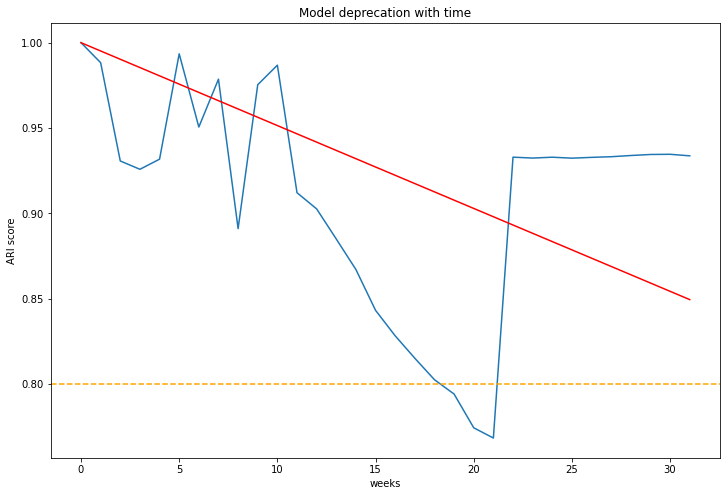

estim_exp_date:
42



ratio = 0.55


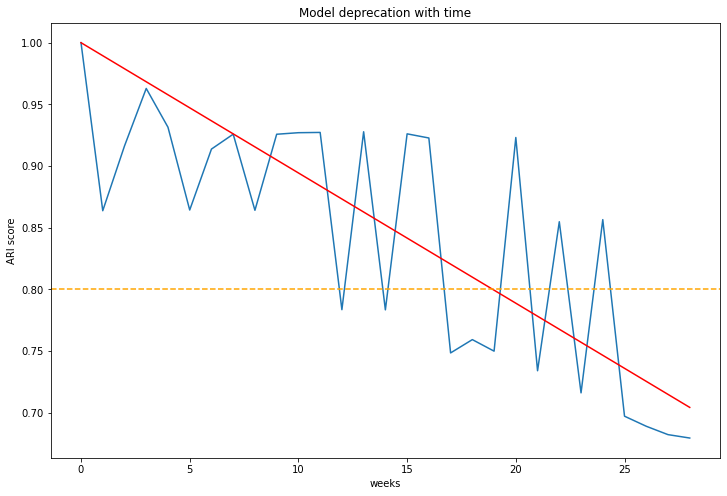

estim_exp_date:
19



ratio = 0.6


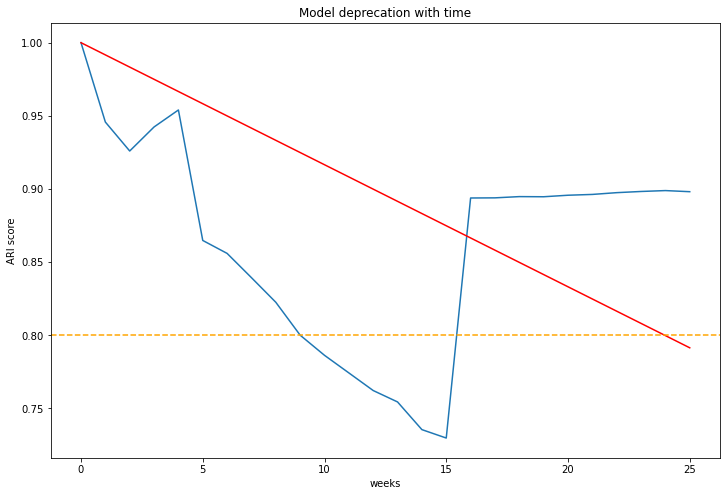

estim_exp_date:
24



ratio = 0.65


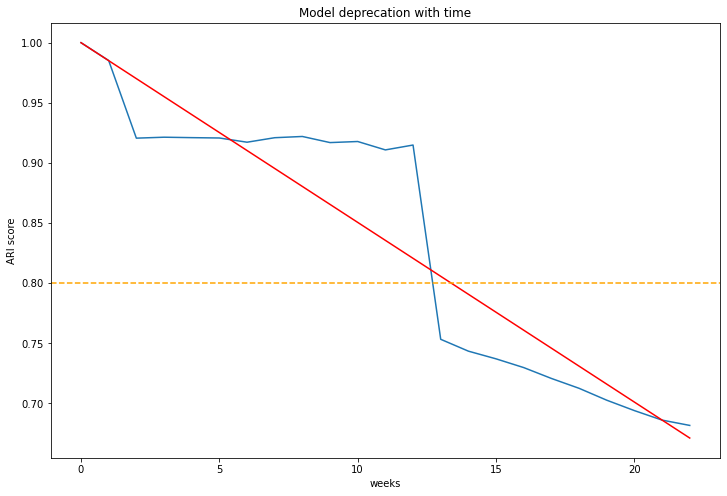

estim_exp_date:
14



ratio = 0.7


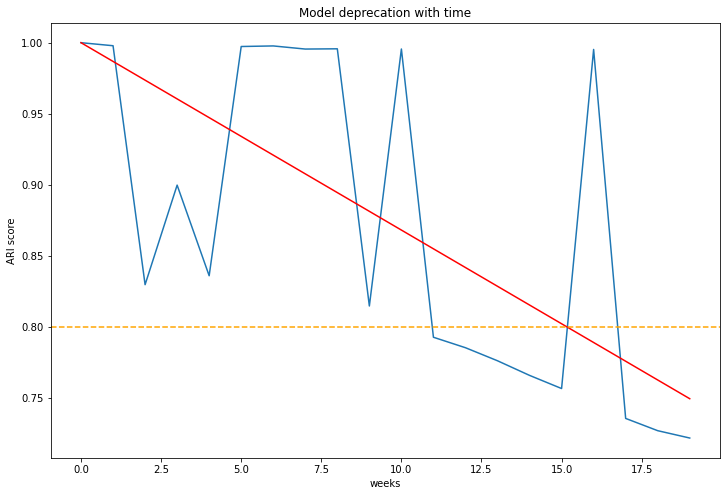

estim_exp_date:
16



ratio = 0.75


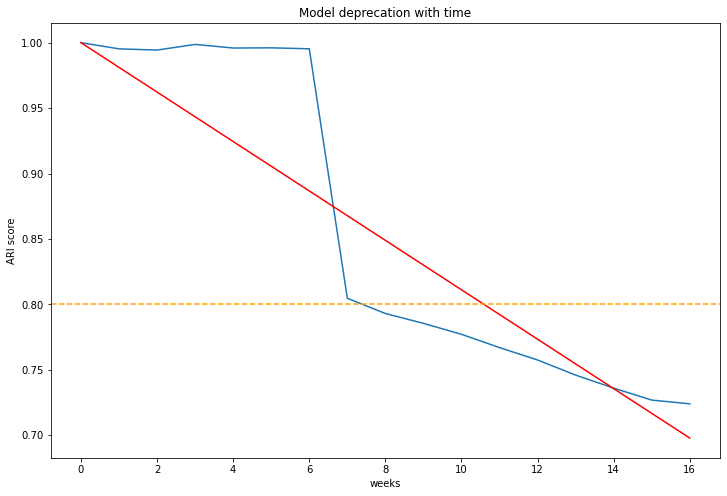

estim_exp_date:
11





In [16]:
# select a percentage of the dataset to train the first model, 
# then compare it to a newly trained model week per week
ratios = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75]

model = KMeans(n_clusters=4, random_state=0)

for ratio in ratios:
    print('ratio =', ratio)
    start_day = get_t0(ratio, data)
    model_deterioration(model, start_day, data)
    print('\n'*2)

### Same as before but instead of using a ratio for the first dataset, <br> all the data is used except a certain number of weeks

nb weeks = 11


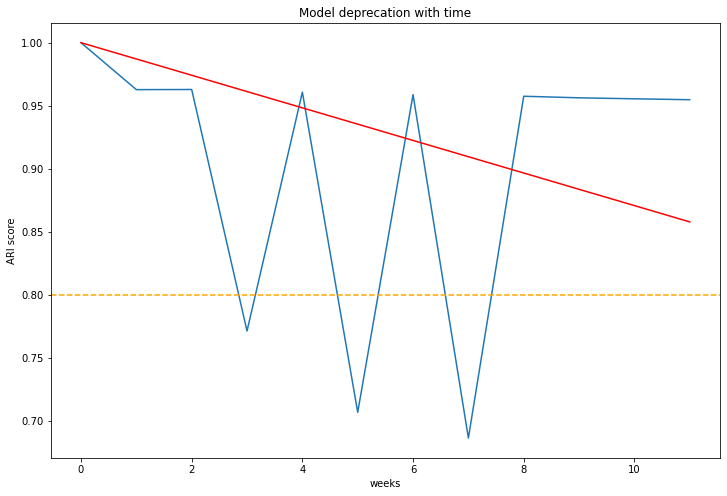

estim_exp_date:
16



nb weeks = 13


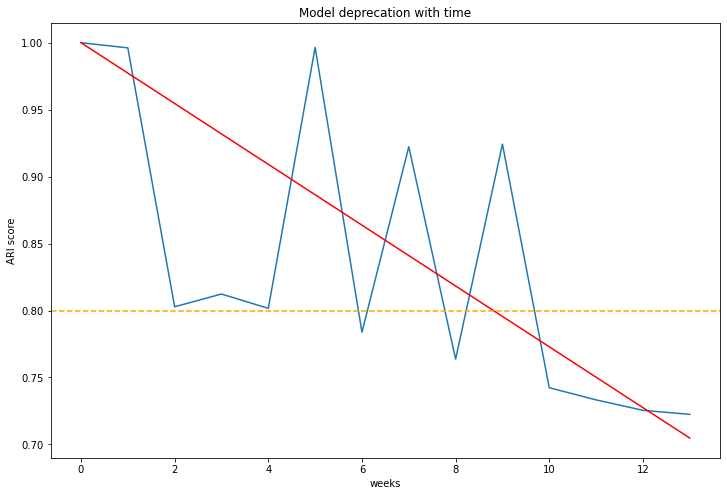

estim_exp_date:
9



nb weeks = 15


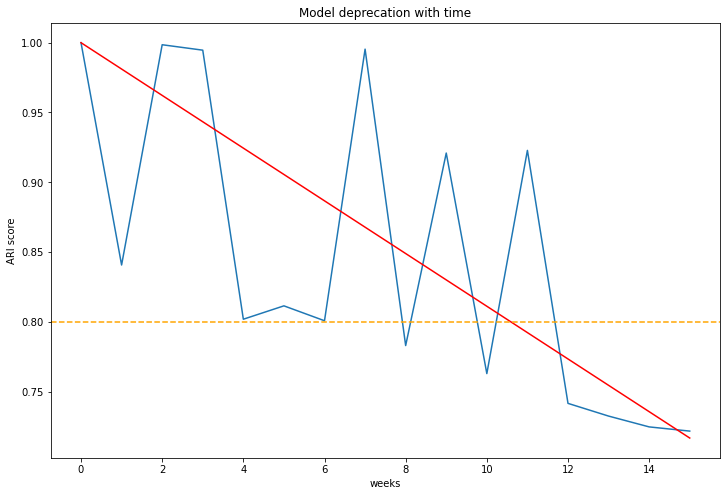

estim_exp_date:
11



nb weeks = 17


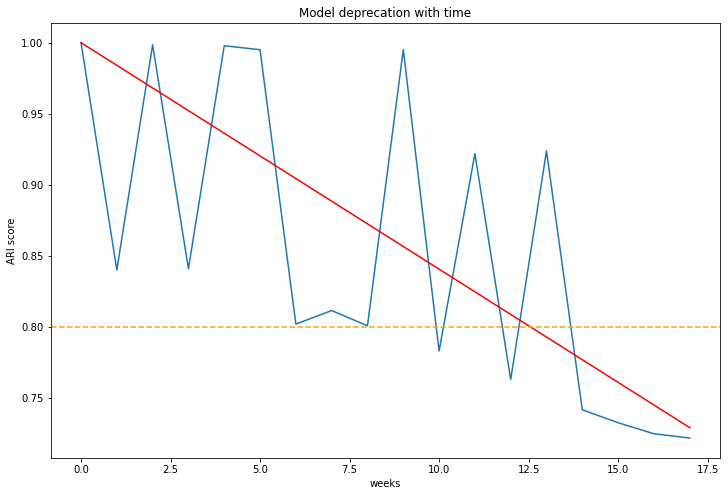

estim_exp_date:
13



nb weeks = 18


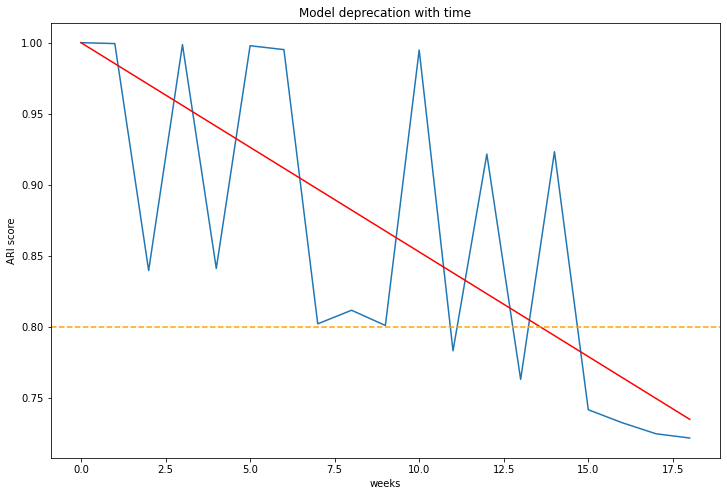

estim_exp_date:
14



nb weeks = 19


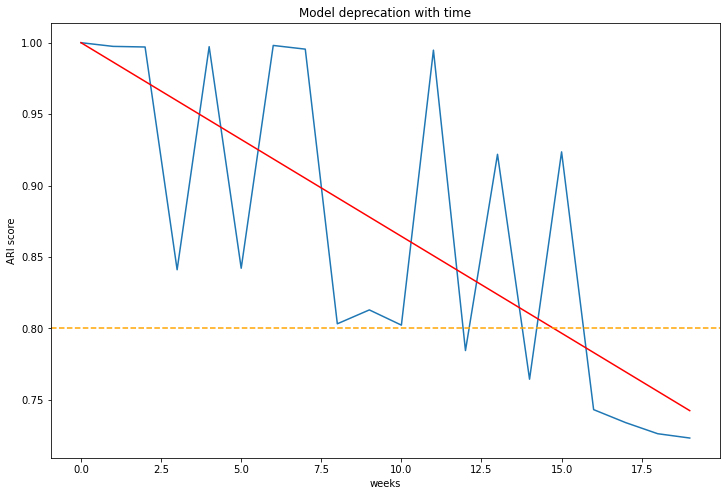

estim_exp_date:
15



nb weeks = 21


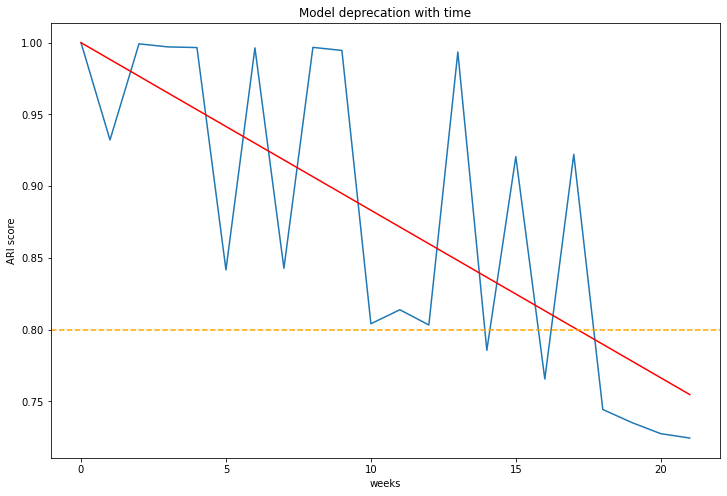

estim_exp_date:
18



nb weeks = 23


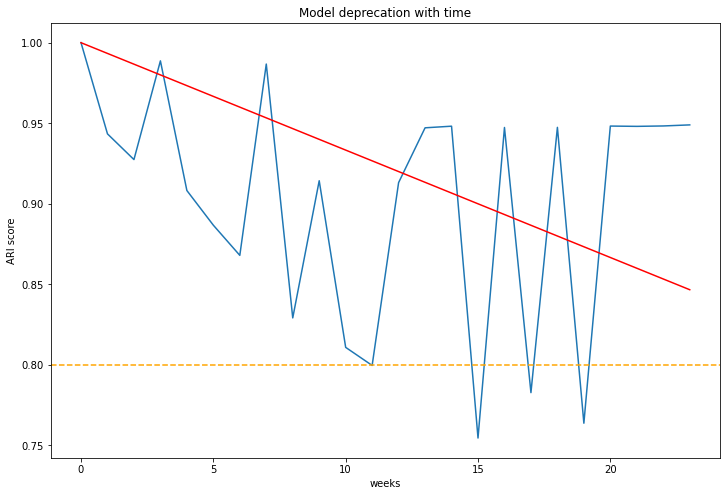

estim_exp_date:
30



nb weeks = 25


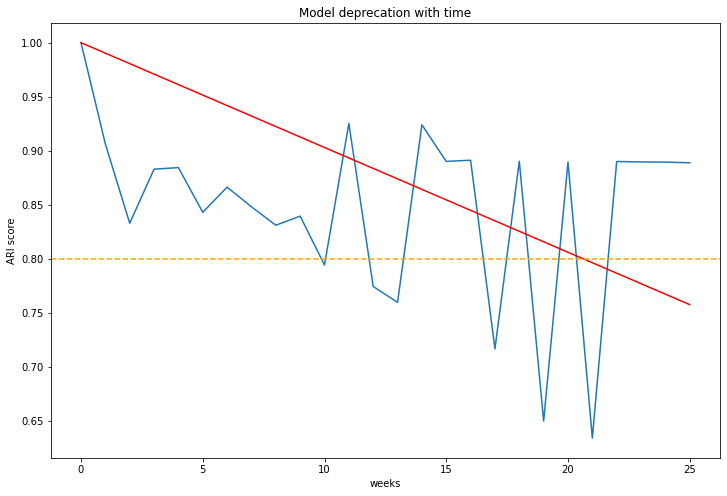

estim_exp_date:
21





In [18]:
nb_weeks_list = [11, 13, 15, 17, 18, 19, 21, 23, 25]

for nb_weeks in nb_weeks_list:
    print('nb weeks =', nb_weeks)
    start_day = data['R'].max() - 7*nb_weeks
    model_deterioration(model, start_day, data)
    print('\n'*2)